<a href="https://colab.research.google.com/github/phuongnam2002/AI_Course/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


## Thực hành

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.shape

(1460, 81)

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Remove Id column
train.drop('Id', axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
train.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.duplicated().sum()

0

In [ ]:
# Calculate the number of missing values in each column
missing_values = train.isna().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(train)) * 100

# Filter columns with missing values
columns_with_nan = missing_values[missing_values > 0]
percentage_with_nan = missing_percentage[missing_percentage > 0]

# Get the data types of columns with missing values
dtypes = train.dtypes[columns_with_nan.index]

# Create a DataFrame with columns, missing values, percentage, and data types
missing_data_df = pd.DataFrame({
    'Column': columns_with_nan.index,
    'Missing Values': columns_with_nan.values,
    'Percentage (%)': percentage_with_nan.values,
    'Data Type': dtypes.values
})

# Display the DataFrame
missing_data_df

,Column,Missing Values,Percentage (%),Data Type
0,LotFrontage,259,17.739726,float64
1,Alley,1369,93.767123,object
2,MasVnrType,872,59.726027,object
3,MasVnrArea,8,0.547945,float64
4,BsmtQual,37,2.534247,object
5,BsmtCond,37,2.534247,object
6,BsmtExposure,38,2.602740,object
7,BsmtFinType1,37,2.534247,object
8,BsmtFinType2,38,2.602740,object
9,Electrical,1,0.068493,object


In [ ]:
def count_columns_by_dtype(data, dtype):
    return data.select_dtypes(include=[dtype]).shape[1]

# Example usage
int_columns_count = count_columns_by_dtype(train, 'int64')
float_columns_count = count_columns_by_dtype(train, 'float64')
object_columns_count = count_columns_by_dtype(train, 'object')

# Display the results
print(f"Number of int64 columns: {int_columns_count}")
print(f"Number of float64 columns: {float_columns_count}")
print(f"Number of object columns: {object_columns_count}")

Number of int64 columns: 34
Number of float64 columns: 3
Number of object columns: 43


In [ ]:
numeric_columns = train.select_dtypes(include = ["int", "float"])

In [ ]:
Numeric_corr = numeric_columns.corr()
Numeric_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Nhận xét: Feature OverAll có độ tương đồng với nhãn SalePrice khá cao và là cao nhất trong số các features

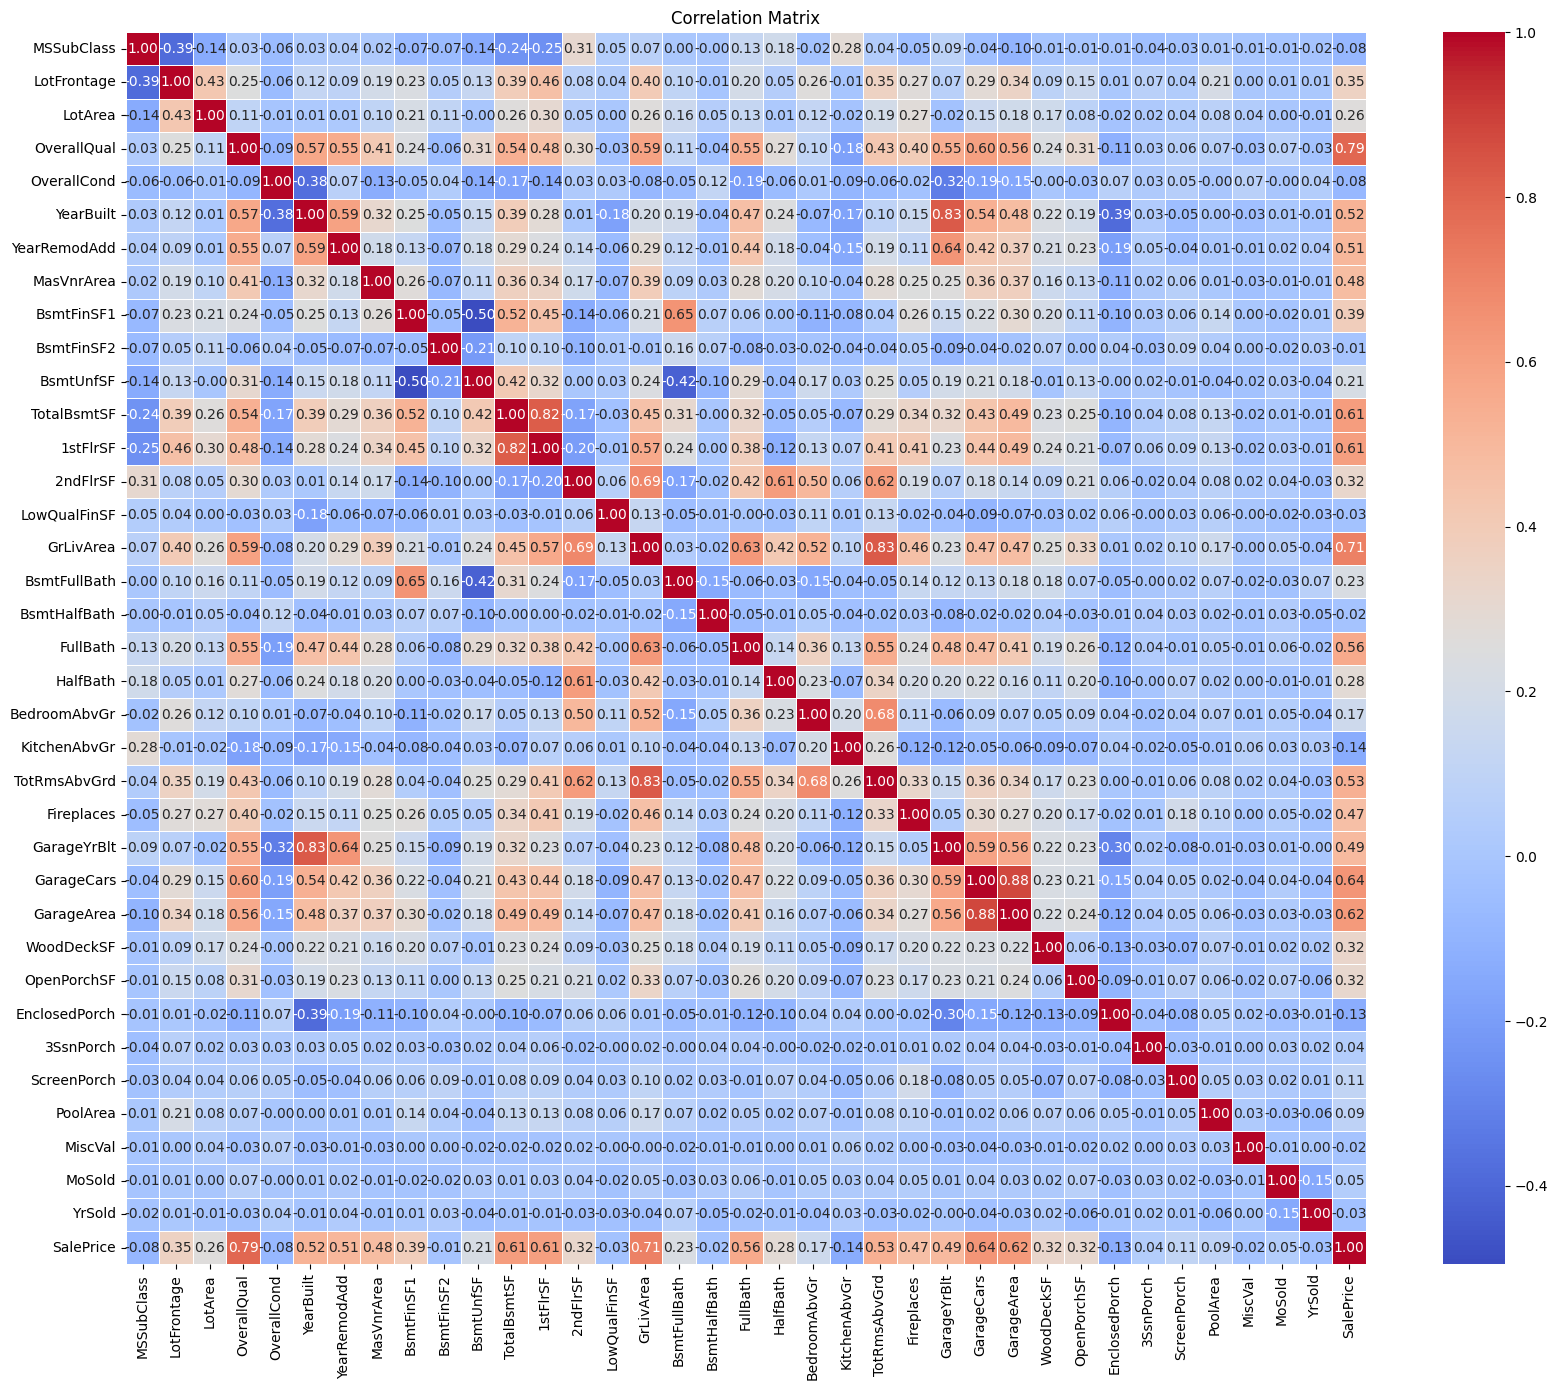

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(Numeric_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Correlation Ranges:
**Low Correlation**:

- **Range**: 0.0 to 0.3 (absolute value)
- **Interpretation**: Little to no linear relationship.

**Moderate (or Good) Correlation**:

- **Range**: 0.3 to 0.7 (absolute value)
- **Interpretation**: A moderate relationship where variables show some degree of linear dependence.

**High Correlation**:

- **Range**: 0.7 to 1.0 (absolute value)
- **Interpretation**: Strong linear relationship, where one variable strongly predicts the other.

In [ ]:
def filter_moderate_high_correlations(data, threshold=0.3):

    # Compute the correlation matrix for numeric columns
    corr_matrix = data.corr()

    # Filter for correlations that are moderate or higher and less than 1.0
    filtered_corr = corr_matrix[(corr_matrix.abs() >= threshold) & (corr_matrix.abs() < 1.0)]

    # Drop rows and columns with all NaN values
    filtered_corr = filtered_corr.dropna(how='all').dropna(axis=1, how='all')

    return filtered_corr

# Example usage
filtered_correlations = filter_moderate_high_correlations(numeric_columns)

# Display the filtered correlations
filtered_correlations

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
MSSubClass,NaN,-0.386347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.386347,NaN,0.426095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.352096,NaN,NaN,NaN,0.344997,NaN,NaN,NaN,0.351799
LotArea,NaN,0.426095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,NaN,0.572323,0.550684,0.411876,NaN,0.308159,...,NaN,0.427452,0.396765,0.547766,0.600671,0.562022,NaN,0.308819,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,-0.375983,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.324297,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,0.572323,-0.375983,NaN,0.592855,0.315707,NaN,NaN,...,NaN,NaN,NaN,0.825667,0.537850,0.478954,NaN,NaN,-0.387268,0.522897
YearRemodAdd,NaN,NaN,NaN,0.550684,NaN,0.592855,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.642277,0.420622,0.371600,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,0.411876,NaN,0.315707,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.364204,0.373066,NaN,NaN,NaN,0.477493
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.495251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386420
BsmtUnfSF,NaN,NaN,NaN,0.308159,NaN,NaN,NaN,NaN,-0.495251,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


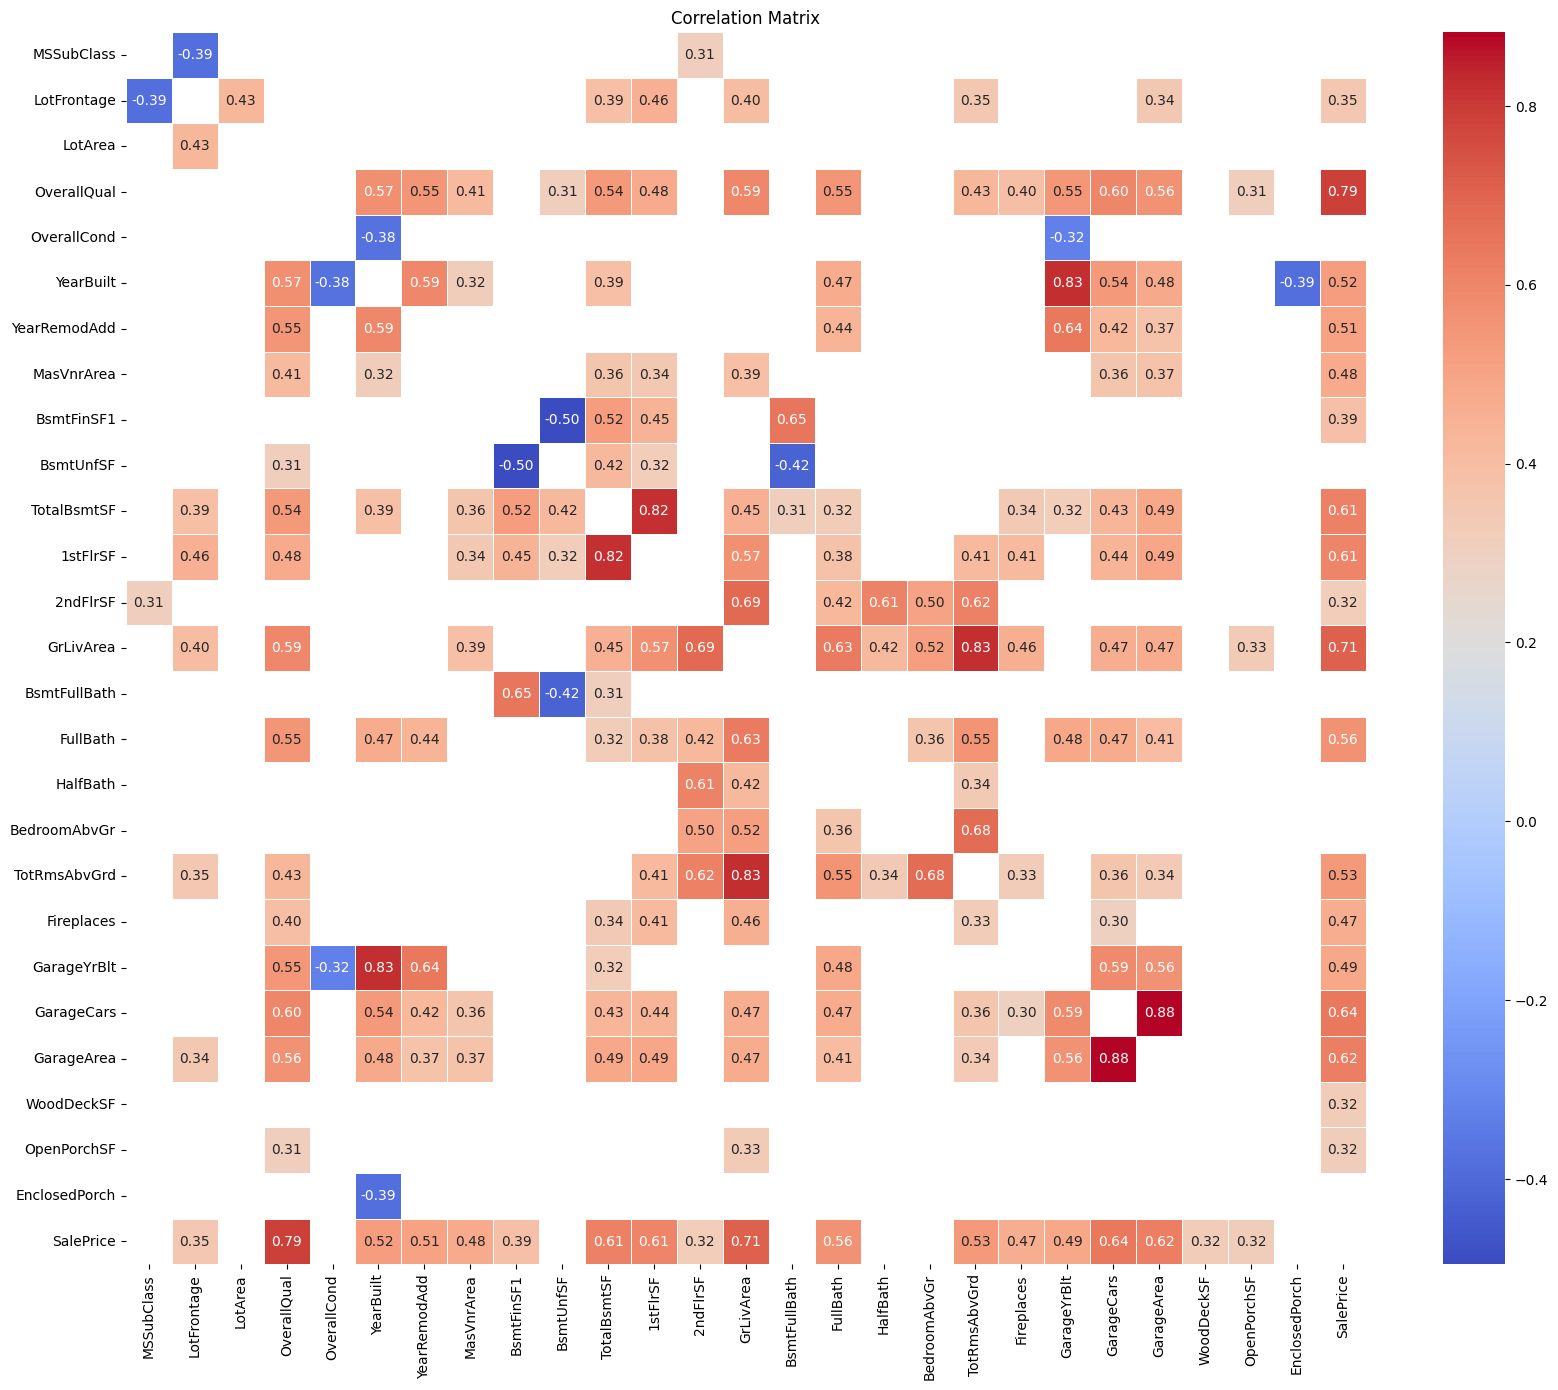

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(filtered_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
categorical_columns = train.select_dtypes(include = ["object"])

In [ ]:
categorical_columns.isna().sum()

,0
MSZoning,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0


**Threshold for Dropping Columns:**

**Low Threshold (e.g., 5-10%)**: Columns with missing values below this threshold are usually retained, as the missing data is relatively minimal and might be handled with imputation techniques if necessary.

**Moderate Threshold (e.g., 10-20%)**: Columns with missing values in this range might be considered for dropping if they are not critical for your analysis or if you have other sources of data.

**High Threshold (e.g., 20-30%)**: Columns with missing values above this threshold often warrant careful consideration. If the column is crucial for your analysis, you might try to impute missing values. If not, it might be reasonable to drop the column.

In [ ]:
threshold = 20
missing_values = train.isna().sum()
missing_percentage = (missing_values / len(train)) * 100
columns_to_drop = missing_percentage[missing_percentage > threshold].index
print(f"Columns with more than {threshold}% missing values:")
print(columns_to_drop)

# drop these columns from the DataFrame
train = train.drop(columns=columns_to_drop)

Columns with more than 20% missing values:
Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Từ 80 features, sử dụng Missing Value Ratio đã loại bỏ được 6 features

In [ ]:
def impute_missing_values(data):
    # Copy the DataFrame to avoid modifying the original data
    data_imputed = data.copy()

    # Iterate over each column in the DataFrame
    for column in data_imputed.columns:
        if data_imputed[column].dtype in [np.float64, np.int64]:
            mean_value = data_imputed[column].mean()
            median_value = data_imputed[column].median()
            if data_imputed[column].isna().sum() / len(data_imputed) > 0.1:
                data_imputed[column] = data_imputed[column].fillna(median_value)  # Replace with median
            else:
                data_imputed[column] = data_imputed[column].fillna(mean_value)  # Replace with mean
        elif data_imputed[column].dtype == 'object':  # Categorical columns
            mode_value = data_imputed[column].mode()[0]
            data_imputed[column] = data_imputed[column].fillna(mode_value)  # Replace with mode

    return data_imputed


train = impute_missing_values(train)

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Apply get_dummies
train_encoded = pd.get_dummies(train, columns=train.select_dtypes(include=['object']).columns)

In [ ]:
X = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models to loop through
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
}

In [ ]:
# Dictionary to store accuracy scores
accuracy_scores = {}

# Loop through each model, train, predict, and calculate accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = mean_squared_error(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Convert the accuracy scores dictionary to a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'MSE Score'])

# Sort the DataFrame by R² Score in descending order
accuracy_df = accuracy_df.sort_values(by='MSE Score', ascending=False)

print(accuracy_df)

               Model     MSE Score
0  Linear Regression  8.809800e+08
1   Ridge Regression  8.529565e+08
2   Lasso Regression  8.007241e+08


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
